In [3]:
import os
import shutil
from tensorflow.python.client import device_lib
import keras
from keras import layers, models, optimizers
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout, Input
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications import EfficientNetB7, ResNet50
from keras.preprocessing import image
from keras.models import Model
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import load_img
from PIL import Image
import os
import shutil

import matplotlib.pyplot as plt

In [4]:
# Dataset personnes
!git clone https://gitlab.enseeiht.fr/aandre2/Dataset_Market-1501-v15.09.15

# Dataset pokemons
!git clone https://gitlab.enseeiht.fr/nurbani/dataset-pokemon


Cloning into 'Dataset_Market-1501-v15.09.15'...
remote: Counting objects: 77323, done.
remote: Compressing objects: 100% (70371/70371), done.
remote: Total 77323 (delta 6952), reused 77323 (delta 6952)
Receiving objects: 100% (77323/77323), 129.42 MiB | 23.07 MiB/s, done.
Resolving deltas: 100% (6952/6952), done.
Checking out files: 100% (143817/143817), done.
fatal: destination path 'dataset-pokemon' already exists and is not an empty directory.


On commence par les chemins

In [5]:
path_pokemon = "/content/dataset-pokemon/"

In [6]:
#Chemin vers les pokemon qu'on va utiliser
pokemon_1G_red_blue = os.listdir(path_pokemon + '1G-red-blue')[:151]
pokemon_1G_red_green = os.listdir(path_pokemon + '1G-red-green')[:151]
pokemon_1G_yellow = os.listdir(path_pokemon + '1G-yellow')[:151]
pokemon_2G_crystal = os.listdir(path_pokemon + '2G-crystal')[:151]
pokemon_2G_gold = os.listdir(path_pokemon + '2G-gold')[:151]
pokemon_2G_silver = os.listdir(path_pokemon + '2G-silver')[:151]
pokemon_3G_emerald = os.listdir(path_pokemon + '3G-emerald')[:151]
pokemon_3G_firered_leafgreen = os.listdir(path_pokemon + '3G-firered-leafgreen')[:151]
pokemon_3G_ruby_sapphire = os.listdir(path_pokemon + '3G-ruby-sapphire')[:151]
pokemon_4G_diamond_pearl = os.listdir(path_pokemon + '4G-diamond-pearl')[:151]
pokemon_4G_heartgold_soulsilver = os.listdir(path_pokemon + '4G-heartgold-soulsilver')[:151]
pokemon_4G_platinum = os.listdir(path_pokemon + '4G-platinum')[:151]
pokemon_5G_black_white = os.listdir(path_pokemon + '5G-black-white')[:151]

Création du fichier de données d'entraînement

In [7]:
# path train
path_train_pokemon = path_pokemon + "train/"

# train folder
if not os.path.exists(path_train_pokemon):
  os.mkdir(path_train_pokemon)

# train images
for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "1G-red-blue/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-1G-red-blue.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "1G-red-green/" + str(filename) +'.png', path_train_pokemon + str(filename) + '-1G-red-green.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "1G-yellow/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-1G-yellow.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "2G-crystal/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-2G-crystal.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "2G-gold/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-2G-gold.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "2G-silver/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-2G-silver.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "3G-emerald/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-3G-emerald.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "3G-firered-leafgreen/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-3G-firered-leafgreen.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "3G-ruby-sapphire/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-3G-ruby-sapphire.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "4G-diamond-pearl/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-4G-diamond-perl.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "4G-heartgold-soulsilver/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-4G-heartgold-soulsilver.png')

# train labels
train_filenames = os.listdir(path_train_pokemon)
train_categories=[]
for filename in train_filenames:
    train_categories.append(filename.split('-')[0])

Création du fichier des données de validation

In [8]:
# path validation
path_validation_pokemon = path_pokemon + "validation/"

# validation folder
if not os.path.exists(path_validation_pokemon):
  os.mkdir(path_validation_pokemon)


# Creation
if not os.path.exists(path_validation_pokemon):
  os.mkdir(path_validation_pokemon)

# Validation images
for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "5G-black-white/" + str(filename) + '.png', path_validation_pokemon + str(filename) + '-5G-black-white.png')

# validation labels
validation_filenames = os.listdir(path_validation_pokemon)
validation_categories=[]
for filename in validation_filenames:
  validation_categories.append(filename.split('-')[0])

Création du fichier des données de test

In [9]:
# path test
path_test_pokemon = path_pokemon + "test/"

# testfolder
if not os.path.exists(path_test_pokemon):
  os.mkdir(path_test_pokemon)


# Test images
for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "4G-platinum/" + str(filename) + '.png', path_test_pokemon + str(filename) + '-4G-platinum.png')

# Test labels
test_filenames = os.listdir(path_test_pokemon)
test_categories=[]
for filename in test_filenames:
  test_categories.append(filename.split('-')[0])

Création des ensemble d'apprentissage, test et validation

In [10]:
#Images d'entrainement
train_df = pd.DataFrame({
    'filename': train_filenames,
    'category': train_categories
})


#Images de validation
validation_df = pd.DataFrame({
    'filename': validation_filenames,
    'category': validation_categories
})


#Images de test
test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': test_categories
})


train_df['category'] = train_df['category'].astype(str)
validation_df['category'] = validation_df['category'].astype(str)
test_df['category'] = validation_df['category'].astype(str)

total_train = train_df.shape[0]
total_validate = validation_df.shape[0]

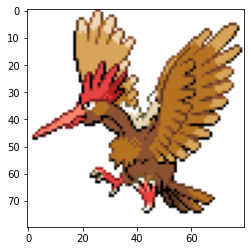

In [11]:
import random
from keras.preprocessing.image import load_img

sample = random.choice(test_filenames)
image = load_img(path_test_pokemon + sample)
plt.imshow(image)
plt.show()

Ensemble d'entraînement, test et validation

In [12]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16
image_size = 32


#Images d'entrainement
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    path_train_pokemon,
    x_col='filename',
    y_col='category',
    target_size=(image_size,image_size),
    batch_size=batch_size
)

#Images de validation
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df, 
    path_validation_pokemon, 
    x_col='filename',
    y_col='category',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

#Images de test
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    path_test_pokemon, 
    x_col='filename',
    y_col='category',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 1661 validated image filenames belonging to 151 classes.
Found 151 validated image filenames belonging to 151 classes.
Found 151 validated image filenames belonging to 151 classes.


Entraînement du réseau de neurone.

On utilise un VGG pré-entraîné sur imagenet



Import VGG

In [13]:
#VGG pré entraîné sur imagenet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()

#Mon input c'est du 40 40 3
input = Input(shape=(32, 32, 3),name = 'image_input')

output_vgg16_conv = model_vgg16_conv(input)

#On rajoute quelques layers
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(151, activation='softmax', name='predictions')(x)

#Mon modele à moi
my_model = Model(inputs=input, outputs=x)

my_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

C'est parti pour l'entraînnement !

In [14]:
my_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

In [15]:
history = my_model.fit(train_generator,
                    steps_per_epoch=total_train//batch_size,
                    validation_data=validation_generator,
                    validation_steps=total_validate//batch_size,
                    epochs=100,
                    )

Epoch 1/200
103/103 [==============================] - 12s 36ms/step - loss: 0.0989 - acc: 0.0042 - val_loss: 0.0414 - val_acc: 0.0069
Epoch 2/200
103/103 [==============================] - 3s 30ms/step - loss: 0.0417 - acc: 0.0040 - val_loss: 0.0412 - val_acc: 0.0069
Epoch 3/200
103/103 [==============================] - 3s 29ms/step - loss: 0.0416 - acc: 0.0063 - val_loss: 0.0411 - val_acc: 0.0000e+00
Epoch 4/200
103/103 [==============================] - 3s 29ms/step - loss: 0.0414 - acc: 0.0015 - val_loss: 0.0410 - val_acc: 0.0069
Epoch 5/200
103/103 [==============================] - 3s 30ms/step - loss: 0.0412 - acc: 0.0021 - val_loss: 0.0407 - val_acc: 0.0069
Epoch 6/200
103/103 [==============================] - 3s 29ms/step - loss: 0.0411 - acc: 0.0046 - val_loss: 0.0406 - val_acc: 0.0069
Epoch 7/200
103/103 [==============================] - 3s 30ms/step - loss: 0.0410 - acc: 0.0054 - val_loss: 0.0405 - val_acc: 0.0000e+00
Epoch 8/200
103/103 [==============================] 

Fonction qui analyse les résultats

In [16]:
def plot_training_analysis():
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

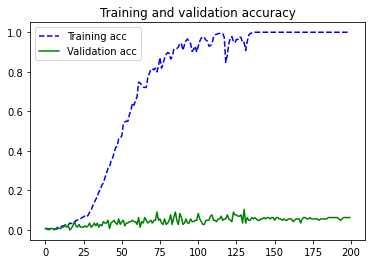

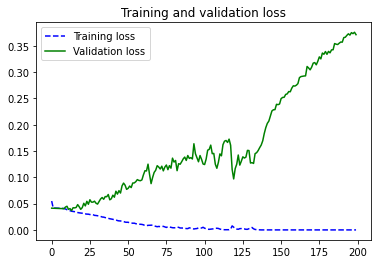

In [17]:
plot_training_analysis()

On observe clairement un phénomène de sur-apprentissage.

In [18]:
#VGG pré entraîné sur imagenet
model_efficient_net = EfficientNetB7(include_top=False, weights="imagenet", classes=151,classifier_activation="softmax",)
model_efficient_net.summary()

#Mon input c'est du 40 40 3
input = Input(shape=(32, 32, 3), name = 'image_input')

output_efficient_net = model_efficient_net(input)

#On rajoute quelques layers
x = Flatten(name='flatten')(output_efficient_net)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(151, activation='softmax', name='predictions')(x)

#Mon modele à moi
my_model_2 = Model(inputs=input, outputs=x)

my_model_2.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [19]:
my_model_2.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

In [20]:
history = my_model_2.fit(train_generator,
                    steps_per_epoch=total_train//batch_size,
                    validation_data=validation_generator,
                    validation_steps=total_validate//batch_size,
                    epochs=100,
                    )

Epoch 1/100
103/103 [==============================] - 44s 174ms/step - loss: 0.1150 - acc: 0.0075 - val_loss: 0.0439 - val_acc: 0.0069
Epoch 2/100
103/103 [==============================] - 13s 128ms/step - loss: 0.0390 - acc: 0.0587 - val_loss: 0.0480 - val_acc: 0.0069
Epoch 3/100
103/103 [==============================] - 13s 127ms/step - loss: 0.0355 - acc: 0.1078 - val_loss: 0.0455 - val_acc: 0.0000e+00
Epoch 4/100
103/103 [==============================] - 13s 126ms/step - loss: 0.0317 - acc: 0.1797 - val_loss: 0.0448 - val_acc: 0.0000e+00
Epoch 5/100
103/103 [==============================] - 13s 126ms/step - loss: 0.0284 - acc: 0.2509 - val_loss: 0.0502 - val_acc: 0.0069
Epoch 6/100
103/103 [==============================] - 13s 125ms/step - loss: 0.0252 - acc: 0.3174 - val_loss: 0.0464 - val_acc: 0.0208
Epoch 7/100
103/103 [==============================] - 13s 125ms/step - loss: 0.0224 - acc: 0.3925 - val_loss: 0.0420 - val_acc: 0.0486
Epoch 8/100
103/103 [===================

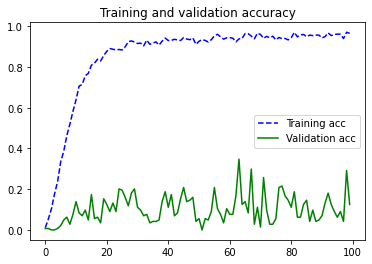

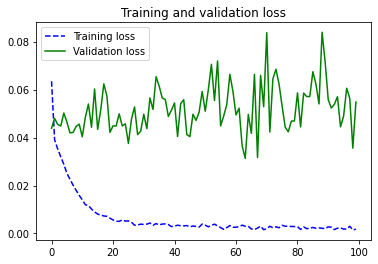

In [21]:
plot_training_analysis()

VGG et Efficient net ont plus de 100M de paramètres, ce qui est bien trop gros pour ma petite base d'apprentissage de 1661 images. Essayons Resnet50 qui a 25M paramètres

In [22]:
model_resnet = ResNet50(weights='imagenet', include_top=False, classes=151)
model_resnet.summary()

#Mon input c'est du 32 32 3
input = Input(shape=(32, 32, 3), name = 'image_input')

output_resnet = model_resnet(input)

#On rajoute quelques layers
x = Flatten(name='flatten')(output_resnet)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dense(151, activation='softmax', name='predictions')(x)

#Mon modele à moi
my_model_3 = Model(inputs=input, outputs=x)

my_model_3.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [23]:
my_model_3.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

In [24]:
history = my_model_3.fit(train_generator,
                    steps_per_epoch=total_train//batch_size,
                    validation_data=validation_generator,
                    validation_steps=total_validate//batch_size,
                    epochs=100,
                    )

Epoch 1/100
103/103 [==============================] - 10s 47ms/step - loss: 0.2909 - acc: 0.0082 - val_loss: 0.0448 - val_acc: 0.0069
Epoch 2/100
103/103 [==============================] - 4s 39ms/step - loss: 0.0392 - acc: 0.0602 - val_loss: 0.0458 - val_acc: 0.0069
Epoch 3/100
103/103 [==============================] - 4s 36ms/step - loss: 0.0330 - acc: 0.1803 - val_loss: 0.0522 - val_acc: 0.0000e+00
Epoch 4/100
103/103 [==============================] - 4s 36ms/step - loss: 0.0273 - acc: 0.3172 - val_loss: 0.0448 - val_acc: 0.0069
Epoch 5/100
103/103 [==============================] - 4s 36ms/step - loss: 0.0233 - acc: 0.4118 - val_loss: 0.0434 - val_acc: 0.0069
Epoch 6/100
103/103 [==============================] - 4s 36ms/step - loss: 0.0193 - acc: 0.5195 - val_loss: 0.0472 - val_acc: 0.0069
Epoch 7/100
103/103 [==============================] - 4s 36ms/step - loss: 0.0146 - acc: 0.6453 - val_loss: 0.0445 - val_acc: 0.0347
Epoch 8/100
103/103 [==============================] - 4s

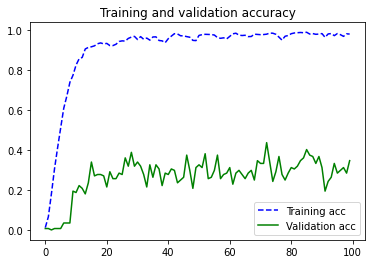

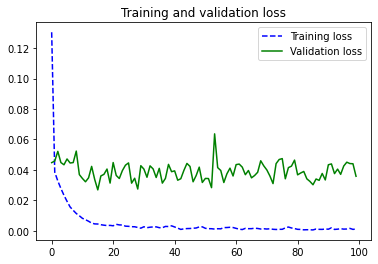

In [25]:
plot_training_analysis()

Toujours pour tester, je vois ce que donne un réseauu de neurone réalisé moi même, un petit CNN

Après réflexion, il serait pertinent de tester nos modèles sur une mesure "top 5" ou "top 10"

Fonction de prédiction aléatoire

In [26]:
# Random sample
sample = random.choice(test_filenames)
image = load_img(path_test_pokemon + sample)
my_model_3.predict_classes(image)
plt.show()

AttributeError: ignored

In [ ]:
def top_5(image_path, database, model):
    # Données
    noms_distances = []

    #Compute the target "encoding" for the image. Use img_to_encoding() 
    encoding = img_to_encoding(image_path, model)
    
    #Find the 5 closest encoding ##
    
    # Initialize "min_dist" to a large value, say 100 
    min_dist = 100
    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        
        # Compute L2 distance between the target "encoding" and the current "emb" from the database.

        dist = np.linalg.norm(encoding - db_enc)

        # Sauvegarde de la distance et de l'image correspondant
        noms_distances.append((name, dist))
    
    noms_distances = sorted(noms_distances, key=lambda liste: liste[1])
    
    #print(noms_distances[:5])
        
    return noms_distances[:5]

In [ ]:
def top_10(image_path, database, model):
    # Données
    noms_distances = []

    #Compute the target "encoding" for the image. Use img_to_encoding() 
    encoding = img_to_encoding(image_path, model)
    
    #Find the 10 closest encoding ##
    
    # Initialize "min_dist" to a large value, say 100 
    min_dist = 100
    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        
        # Compute L2 distance between the target "encoding" and the current "emb" from the database.

        dist = np.linalg.norm(encoding - db_enc)

        # Sauvegarde de la distance et de l'image correspondant
        noms_distances.append((name, dist))
    
    noms_distances = sorted(noms_distances, key=lambda liste: liste[1])
    
    #print(noms_distances[:10])
        
    return noms_distances[:10]

In [ ]:
L = ["1G_red_blue","1G_red_green","1G_yellow","2G_crystal","2G_gold","2G_silver","3G_emerald","3G_firered","3G_ruby","4G_diamond","4G_heartgold","4G_platinum","5G_black_white"]
for k in range(0,len(L)):
  compt = 0
  # Ajout des pokémons
  for i in range(1,151):
    L1 = top_5("{0}/{1}.png".format(L[k],i), path_train_pokemon, my_model)
    for j in range(0,5):
      if (L1[j][0]=="{0}_{1}".format("5G_black_white",i)):
        compt+= 1
  print(compt/150.*100)